[*********************100%***********************]  1 of 1 completed
                             Open   High    Low  Close  Adj Close  Volume
Datetime                                                                 
2022-08-08 09:30:00-04:00  7.2900  7.350  7.290  7.330      7.330    9938
2022-08-08 09:35:00-04:00  7.3700  7.470  7.370  7.465      7.465    4438
2022-08-08 09:40:00-04:00  7.4600  7.460  7.420  7.420      7.420    3132
2022-08-08 09:45:00-04:00  7.4400  7.450  7.390  7.400      7.400   21431
2022-08-08 09:50:00-04:00  7.3700  7.420  7.355  7.420      7.420    7855
...                           ...    ...    ...    ...        ...     ...
2022-08-19 15:40:00-04:00  7.4450  7.450  7.430  7.450      7.450    3910
2022-08-19 15:45:00-04:00  7.4500  7.460  7.435  7.440      7.440    5011
2022-08-19 15:50:00-04:00  7.4300  7.440  7.425  7.440      7.440   11759
2022-08-19 15:55:00-04:00  7.4389  7.445  7.410  7.420      7.420   15428
2022-08-19 16:00:00-04:00  7.4200  7.420  7

C:\Users\Akshay\Desktop\New folder (2)\RF.py:41: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lm.fit(x.values.reshape(-1, 1),y)
C:\Users\Akshay\Desktop\New folder (2)\RF.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lmL.fit(x.values.reshape(-1, 1),z)


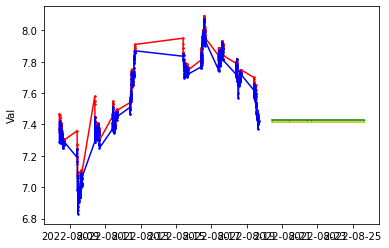

C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


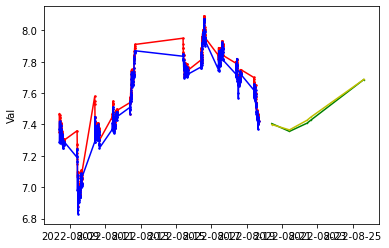

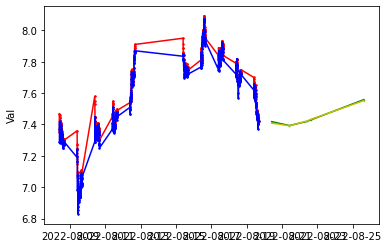

In [1]:
from tkinter.ttk import *
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from tkinter import filedialog
import numpy as np
import pandas as pd
from yahoo_fin import stock_info
import yfinance as yf
import RF
import SVM
import matplotlib.pyplot as plt
from datetime import date

master = tk.Tk()
master.title("Stock Market Prediction")
master.geometry("950x630")
#master.resizable(False, False)

x=None
y=None
z=None
x2=None
predictions=None
predictions1=None
Spredictions=None
Spredictions1=None

datelist=[]


    
def Get_data(f1):
    global x,y,z,x2,predictions,predictions1,Spredictions,Spredictions1
    if bb1.get()!='':
        if f1==0:
            data = yf.download(tickers=bb1.get(), period='10d', interval='5m')
            #data = yf.history(start="2021-12-25",end="2021-12-29",interval="5m")
            #data.index = data.index.tz_localize(None)
            print(data)
            data.to_csv('file1.csv')
            messagebox.showinfo(title="Alert Message", message="RealTime Data Carried successfully")
        
        if f1==1:
            x,y,z,x2,predictions,predictions1=RF.RFresult(datelist)
            #print(predictions)
            #print(predictions1)
            a=0
            listboxRF.delete('0','end')
            for i in range(len(predictions)):
                a=a+1
                listboxRF.insert(a, str(round(predictions[i],3))+"-"+str(round(predictions1[i],3)))
                
            plt.plot(x2, predictions,label='Linear fit',marker='.',markersize=1, color='g')
            plt.plot(x2, predictions1,label='Linear fit',marker='.',markersize=1, color='y')
            plt.plot(x, y,label='value', marker='.',markersize=3, color='r')
            plt.plot(x, z,label='value', marker='.',markersize=3, color='b')
            plt.ylabel('Val')
            plt.show()
    
        elif f1==2:
            x,y,z,x2,Spredictions,Spredictions1=SVM.SVMresult(datelist)
            #print(Spredictions)
            #print(Spredictions1)
            a=0
            listboxSVM.delete('0','end')
            for i in range(len(predictions)):
                a=a+1
                listboxSVM.insert(a, str(round(Spredictions[i],3))+"-"+str(round(Spredictions1[i],3)))
        
            plt.plot(x2, Spredictions,label='Linear fit',marker='.',markersize=1, color='g')
            plt.plot(x2, Spredictions1,label='Linear fit',marker='.',markersize=1, color='y')
            plt.plot(x, y,label='value', marker='.',markersize=3, color='r')
            plt.plot(x, z,label='value', marker='.',markersize=3, color='b')
            plt.ylabel('Val')
            plt.show()
            
        elif f1==3:
            #x,y,z,x2,predictions,predictions1=SVM.SVMresult()
            a=0
            listboxRFSVM.delete('0','end')
            for i in range(len(predictions)):
                a=a+1
                predictions[i]=(predictions[i]+Spredictions[i])/2
                predictions1[i]=(predictions1[i]+Spredictions1[i])/2
                listboxRFSVM.insert(a, str(round(predictions[i],3))+"-"+str(round(predictions1[i],3)))
            
            plt.plot(x2, predictions,label='Linear fit',marker='.',markersize=1, color='g')
            plt.plot(x2, predictions1,label='Linear fit',marker='.',markersize=1, color='y')
            plt.plot(x, y,label='value', marker='.',markersize=3, color='r')
            plt.plot(x, z,label='value', marker='.',markersize=3, color='b')
            plt.ylabel('Val')
            plt.show()
        
    else:
        messagebox.showinfo(title="Alert Message", message="Enter Company Name")


def Add_datetime():
    global datelist
    if aa1.get()!='':
         datelist.append(aa1.get())
    a=0
    listbox.delete('0','end')
    for i in datelist:
        a=a+1
        listbox.insert(a, i)
        
label = tk.Label(master ,width=50,text = "Stock Market Prediction",font=("arial italic", 25), bg="green", fg="white").grid(row=0, column=0,columnspan=4)


b = tk.Label(master ,width=20,text = "Set Company Name").grid(row=1, column=0,padx=20, pady=5)
bb1 = tk.StringVar()
b1 = tk.Entry(master,width=20,textvariable=bb1).grid(row=1, column=1,padx=20, pady=5)
btnb2 = tk.Button(master,text="Get RealTime Data",width=20,command=lambda:Get_data(0)).grid(row=1, column=2,padx=20, pady=5)


b = tk.Label(master ,width=20,text = "Predictive DateTime").grid(row=2, column=0,padx=20, pady=5)
aa1 = tk.StringVar()
a1 = tk.Entry(master,width=20,textvariable=aa1).grid(row=2, column=1,padx=20, pady=5)
btnb3 = tk.Button(master,text="Add",width=20,command=lambda:Add_datetime()).grid(row=2, column=2,padx=20, pady=5)
today = date.today()
aa1.set(str(today)+" 09:00:00")

listbox = tk.Listbox(master, height = 5, 
                  width = 20,
                  bg = "grey",
                  activestyle = 'dotbox', 
                  font = "Helvetica",
                  fg = "yellow")
listbox.grid(row=3, column=2)

b = tk.Label(master ,width=30,text = "Random Forest Result (High-Low)").grid(row=4, column=1,padx=20, pady=5)
listboxRF = tk.Listbox(master, height = 5, 
                  width = 20, 
                  bg = "grey",
                  activestyle = 'dotbox', 
                  font = "Helvetica",
                  fg = "yellow")
listboxRF.grid(row=4, column=2,padx=20, pady=5)
btn1 = tk.Button(master,text="Random Forest",width=20,command=lambda:Get_data(1)).grid(row=4, column=3,padx=20, pady=20)


b = tk.Label(master ,width=30,text = "SVM Result (High-Low)").grid(row=5, column=1,padx=20, pady=5)
listboxSVM = tk.Listbox(master, height = 5, 
                  width = 20, 
                  bg = "grey",
                  activestyle = 'dotbox', 
                  font = "Helvetica",
                  fg = "yellow")
listboxSVM.grid(row=5, column=2,padx=20, pady=5)
btn2 = tk.Button(master,text="Support Vector Machine",width=20,command=lambda:Get_data(2)).grid(row=5, column=3,padx=20, pady=20)

b = tk.Label(master ,width=30,text = "RF and SVM Result (High-Low)").grid(row=6, column=1,padx=20, pady=5)
listboxRFSVM = tk.Listbox(master, height = 5, 
                  width = 20, 
                  bg = "grey",
                  activestyle = 'dotbox', 
                  font = "Helvetica",
                  fg = "yellow")
listboxRFSVM.grid(row=6, column=2,padx=20, pady=5)
btn3 = tk.Button(master,text="Final RF and SVM Result",width=20,command=lambda:Get_data(3)).grid(row=6, column=3,padx=20, pady=20)

btn4 = tk.Button(master,text="Exit",width=20,command=master.destroy).grid(row=7, column=3,padx=20, pady=20)


#btn1 = ttk.Button(window , text="Set",command=lambda:setTextInput("hi")).grid(row=5,column=1)


master.mainloop()



